<h1>Predict President Election</h1>

<h2>Import needed package</h2> 

In [13]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from scipy import stats
import numpy as np

<h2>use package ggplot</h2>

In [14]:
plt.style.use('ggplot')

<h2> read csv file from local<h2>

In [16]:
OH = pd.read_csv('http://jsharpna.github.io/141B/data/OHvotes.csv')

OH.head()

,County Name,Precinct Name,Precinct Code,Region Name,Media Market,Registered Voters,Total Voters,Turnout Percentage,James Jerome Bell (WI)*,Michael Bickelmeyer (WI)*,...,Joseph Maldonado (WI)*,Michael Andrew Maturen (WI)*,Evan McMullin (WI)*,Monica Moorehead (WI)*,Joe Schriner (WI)*,Mike Smith (WI)*,Jill Stein (G),Josiah R. Stroh (WI)*,Douglas W. Thomson (WI)*,Donald J. Trump (R)
0,Adams,BRATTON TOWNSHIP,AAA,Southwest,Cincinnati,923,661,71.61%,0,0,...,0,0,0,0,0,0,4,0,0,532
1,Adams,BRUSH CREEK TOWNSHIP,AAB,Southwest,Cincinnati,768,514,66.93%,0,0,...,0,0,0,0,0,0,0,0,0,390
2,Adams,LOCUST GROVE,AAD,Southwest,Cincinnati,684,522,76.32%,0,0,...,0,0,0,0,0,0,4,0,0,408
3,Adams,GREEN TOWNSHIP,AAE,Southwest,Cincinnati,409,259,63.33%,0,0,...,0,0,0,0,0,0,1,0,0,176
4,Adams,JEFFERSON TOWNSHIP,AAG,Southwest,Cincinnati,537,351,65.36%,0,0,...,0,0,0,0,0,0,2,0,0,258


<h2> summary of vote for each candidates<h2>

In [4]:
from locale import atof
import locale
locale.setlocale(locale.LC_NUMERIC, '')
badobj = [u'Registered Voters',u'Total Voters',u'Hillary Clinton (D)',u'Donald J. Trump (R)']
OH[badobj] = OH[badobj].applymap(lambda x: int(atof(x)))

candidates = [u'Hillary Clinton (D)',u'Gary Johnson',u'Jill Stein (G)',u'Donald J. Trump (R)']
OHred = OH[['County Name','Registered Voters','Total Voters']+candidates]
OHcounties = OHred.groupby('County Name').sum()

OHcounties.head()

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
County Name,,,,,,
Adams,16945,11583,2326,226,47,8659
Allen,68054,46735,13294,1486,323,30487
Ashland,35452,25104,5740,906,185,17493
Ashtabula,60624,41797,15577,1213,427,23318
Athens,45418,30042,16370,1012,539,11354


<h2>mean registered voters for Trump and Clinton<h2>

In [5]:
DbeatsH = OHcounties['Donald J. Trump (R)'] > OHcounties['Hillary Clinton (D)']
d,h = OHcounties[DbeatsH]['Registered Voters'].mean(), OHcounties[~DbeatsH]['Registered Voters'].mean()
OHcounties['TMP'] = (OHcounties['Donald J. Trump (R)'] - OHcounties['Hillary Clinton (D)']) / OHcounties['Total Voters']
print 'Mean registered voters in Trumpland ' + str(d)
print 'Mean registered voters in Clintonland ' + str(h)
print 'Ratio (Clinton/Trump): ' + str(h/d)

Mean registered voters in Trumpland 55837.0625
Mean registered voters in Clintonland 424257.5
Ratio (Clinton/Trump): 7.59813430372


<h2>insert map-drawing package and get plot parameters<h2>

In [6]:
from mpl_toolkits.basemap import Basemap
cmap = plt.cm.seismic

In [7]:
m = Basemap(llcrnrlon=-85,llcrnrlat=38,urcrnrlon=-80,urcrnrlat=42,
            projection='lcc',lat_1=39,lat_2=41,lon_0=-82.5)

In [8]:
m.drawmapboundary()
m.drawcounties()

In [9]:
OHcnames = [(i,c['NAME']) for i,c in enumerate(m.counties_info) if c['STATE'] == 'OH']

In [10]:
ax = plt.gca()

In [11]:
for i,c in OHcnames:
    ccol = rgb2hex(cmap((OHcounties['TMP'].loc[c] + 1)/2)[:3])
    seg = m.counties[i]
    poly = Polygon(seg,facecolor=ccol,edgecolor=ccol)
    ax.add_patch(poly)

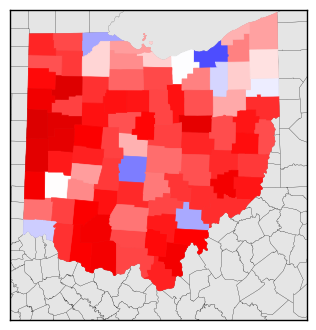

In [12]:
plt.show()

<b>OH: Percent swing from Clinton (Blue) to Trump (Red)</b>

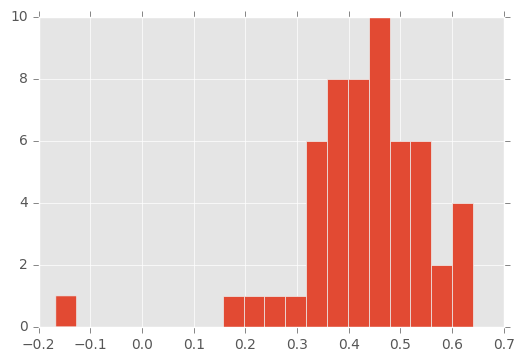

In [26]:
smallcounties = OHcounties['Registered Voters'] < 50000
plt.hist(OHcounties[smallcounties]['TMP'],bins=20)
plt.show()

In [27]:
candperc = pd.DataFrame({c : OH[c] / OH[u'Total Voters'] for c in candidates})
candperc[['County Name','Precinct Name','Total Voters']] = OH[['County Name','Precinct Name','Total Voters']]
candperc = candperc.set_index(['County Name','Precinct Name'])

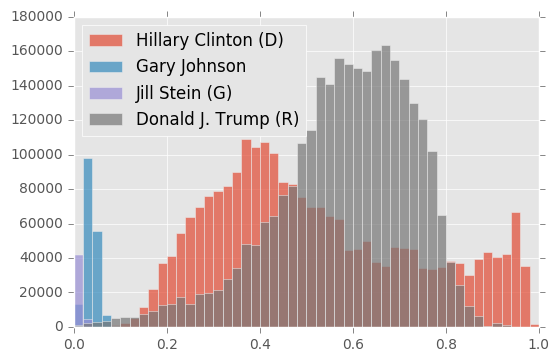

In [28]:
for c in candidates:
    plt.hist(candperc[c],alpha=.7,label=c,bins=50,range=(0,1),normed=0,weights=OH[c])
plt.legend(loc=2)
plt.show()

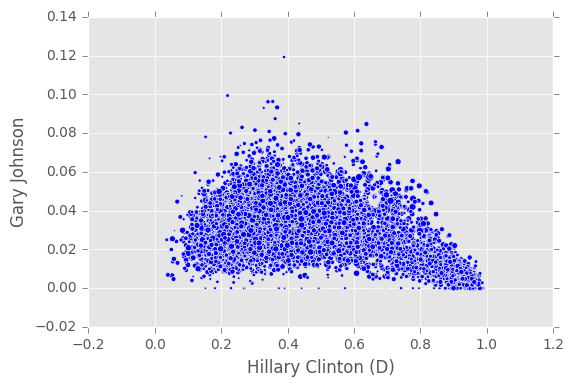

In [29]:
c0, c1 = candidates[0], candidates[1]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

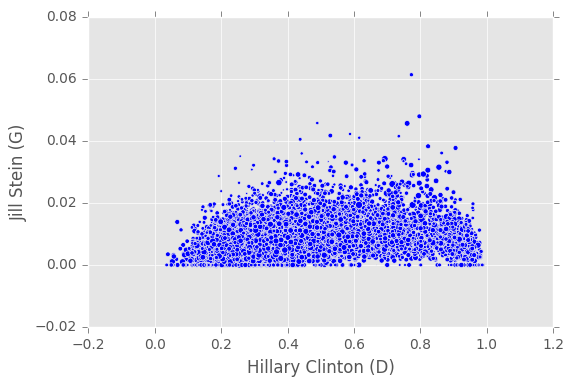

In [30]:
c0, c1 = candidates[0], candidates[2]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

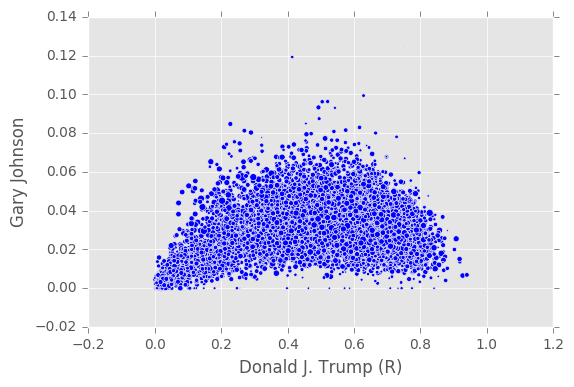

In [31]:
c0, c1 = candidates[3], candidates[1]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

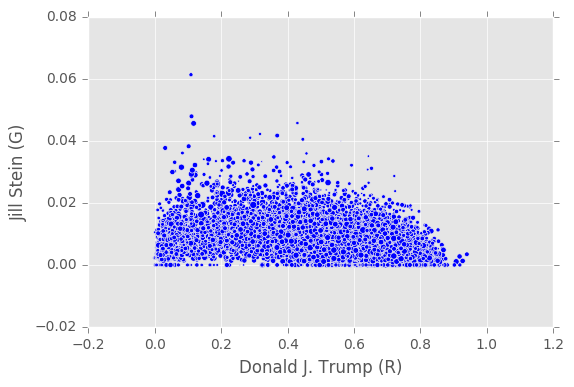

In [32]:
c0, c1 = candidates[3], candidates[2]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

In [33]:
taus = pd.DataFrame([[stats.kendalltau(candperc[candperc['Total Voters'] > 100][c0],candperc[candperc['Total Voters'] > 100][c1])[0] for c0 in candidates] for c1 in candidates])
taus = taus.rename({i:candidates[i] for i in range(4)})
taus = taus.rename(columns = {i:candidates[i] for i in range(4)})
taus

,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
Hillary Clinton (D),1.000000,-0.117957,0.206878,-0.942552
Gary Johnson,-0.117957,1.000000,0.099360,0.075659
Jill Stein (G),0.206878,0.099360,1.000000,-0.227611
Donald J. Trump (R),-0.942552,0.075659,-0.227611,1.000000
